In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

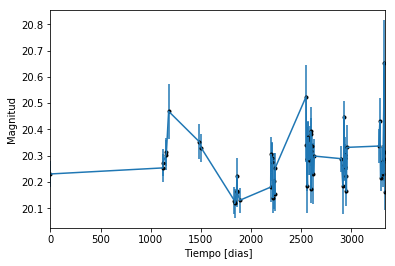

In [2]:
data = np.genfromtxt('LC_20907_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

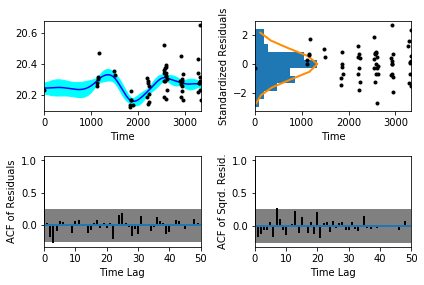

In [5]:
sample.assess_fit()

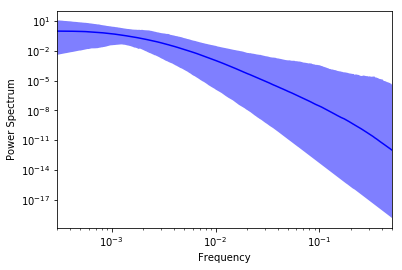

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)


In [10]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000374595,0.428432,'Medida del nivel de ruido')

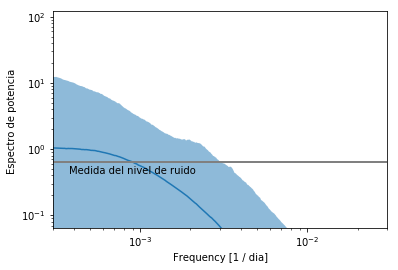

In [11]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

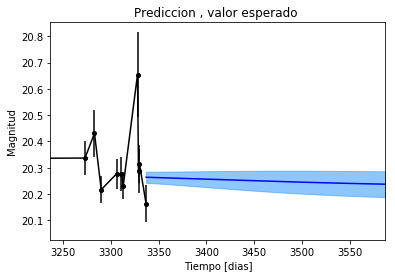

In [7]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

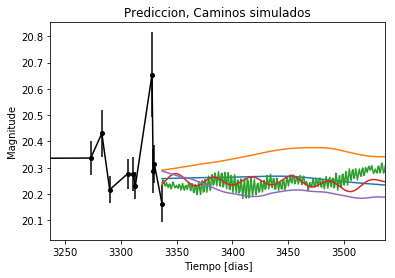

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


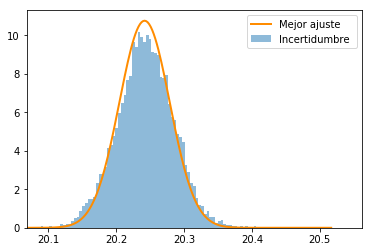

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

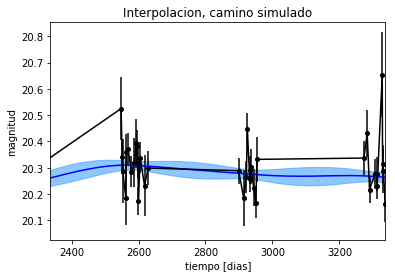

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

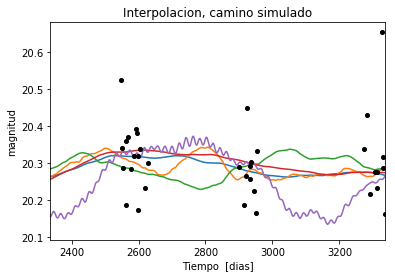

In [15]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 568.658840312
Median: 0.00570866474272
Standard deviation: 0.164914069014
68% credibility interval: [ 0.00068208  0.12251626]
95% credibility interval: [  3.36919262e-04   6.65017351e-01]
99% credibility interval: [  3.05431393e-04   8.90476763e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 531.247544928
Median: 0.00187978639493
Standard deviation: 0.0808045697854
68% credibility interval: [ 0.00050225  0.02239963]
95% credibility interval: [ 0.00032076  0.22952208]
99% credibility interval: [  3.04999217e-04   7.10850059e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 582.061236612
Median: 0.0115546883991
Standard

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 917.178718141
Median: 88.2414319911
Standard deviation: 1.6139435751
68% credibility interval: [ 86.50652218  89.36778626]
95% credibility interval: [ 83.99573465  90.24823346]
99% credibility interval: [ 81.73586056  90.83847651]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 566.302719244
Median: 0.444205847513
Standard deviation: 1.92699105774
68% credibility interval: [ 0.04432992  3.20767107]
95% credibility interval: [ 0.01335349  6.3390664 ]
99% credibility interval: [ 0.0101434   9.34548296]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 351.735524218
Median: 0.264338082501
Standard deviation: 8.21805279809
68% credibility interval: [ 0.00789542  6.1563111 ]
95% credibility interval: [  3.88466677e-0

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 6424.72531199
Median: 3.90704708112e-32
Standard deviation: 9.15577209337e+86
68% credibility interval: [  9.31384690e-72   2.42855778e+13]
95% credibility interval: [  4.73930575e-136   2.85016847e+076]
99% credibility interval: [  2.85629694e-146   1.10036691e+085]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2189.91253012
Median: 20.2622253988
Standard deviation: 0.0314253609222
68% credibility interval: [ 20.2360242   20.28647506]
95% credibility interval: [ 20.19856697  20.3239237 ]
99% credibility interval: [ 20.1469998   20.35544848]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 273.241628567
Median: 0.0059338083579
Standard deviation: 0.235484471167
68% credibility interval: [ 0.          0.33376643]
95% credibility interval: [ 0.          0.86891906]
99% credibility interval: [ 0.          0.97651751]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 273.241628567
Median: 0.0059338083579
Standard deviation: 0.235484471167
68% credibility interval: [ 0.          0.33376643]
95% credibility interval: [ 0.          0.86891906]
99% credibility interval: [ 0.          0.97651751]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 2617.67783443
Median: 0.0
Standard deviation: 0.00825872656799
68% cre

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 917.178718141
Median: 88.2414319911
Standard deviation: 1.6139435751
68% credibility interval: [ 86.50652218  89.36778626]
95% credibility interval: [ 83.99573465  90.24823346]
99% credibility interval: [ 81.73586056  90.83847651]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2289.94530347
Median: 0.00382106152643
Standard deviation: 0.00609405576687
68% credibility interval: [ 0.00187914  0.0081141 ]
95% credibility interval: [ 0.0009561   0.01929606]
99% credibility interval: [ 0.00051141  0.03584278]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2689.62006457
Median: 1.08859965476
Standard deviation: 0.164380069521
68% credibility interval: [ 0.93967797  1.25990065]
95% credibility interval: [ 0.81827372  1.46520353]
99% credibility interval: [ 0.75146661  1.61973516]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1082.41102315
Median: 1.55090496852e-05
Standard deviation: 0.077196192857
68% credibility interval: [  9.19807198e-18   1.62065485e-03]
95% credibility interval: [  4.29564668e-81   7.23173178e-02]
99% credibility interval: [  1.18492687e-91   5.03844381e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 568.658840312
Median: (-0.0358685984351-0.316817260476j)
Standard deviation: 1.80634295845
68% credibility interval: [-0.76979236+0.j         -0.00428562-0.00407071j]
95% credibility interval: [ -4.17842725e+00+0.j         -2.11692616e-03-0.1197873j]
99% credibility interval: [ -5.59503051e+00+0.j          -1.91908204e-03-0.00437867j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 531.247544928
Median: (-0.0118110462572+0.472848921573j)
Standard deviation: 1.5642773738
68% credibility interval: [-0.14074105+0.24389212j -0.00315575+0.69204471j]
95% credibility interval: [-1.44212976+1.20011015j -0.00201542+0.00493068j]
99% credibility interval: [ -4.46640265e+00+4.41014848j  -1.91636660e-03+0.0098334j ]
Posterior summa